In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from icedef import metocean, plot

In [4]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
LARGE_SIZE = 14

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

In [5]:
start_time = np.datetime64('2015-04-01')
end_time = np.datetime64('2015-04-30')
time_frame = start_time, end_time

# ECMWF Ocean Model: GLOBAL_ANALYSIS_FORECAST_PHY_001_024

Model information:

<table>
  <tr>
    <th>Product identifier</th>
    <th>GLOBAL_ANALYSIS_FORECAST_PHY_001_024</th> 
  </tr>
  <tr>
    <td>Spatial resolution</td>
    <td>1/12 deg; 1 vertical level (surface)</td> 
  </tr>
  <tr>
    <td>Temporal resolution</td>
    <td>1-hourly mean</td> 
  </tr>
      <tr>
    <td>Grid</td>
    <td>Regular</td> 
  </tr>
      <tr>
    <td>Atmospheric forcings</td>
    <td>3-hourly from ECMWF</td> 
  </tr>
      <tr>
    <td>Ocean model</td>
    <td>NEMO 3.1</td> 
  </tr>
      <tr>
    <td>Tides</td>
    <td>No</td> 
  </tr>
      <tr>
    <td>Reanalysis</td>
    <td>No</td> 
  </tr>
</table>

Available to pull from IceDEF server:

<table>
  <tr>
    <td>Longitude Range</td>
    <td>40W - 60W</td>
  </tr>
  <tr>
    <td>Latitude Range</td>
    <td>40N - 60N</td>
  </tr>
</table> 

In [6]:
model_name = 'ECMWF'
ocean = metocean.Ocean(time_frame, model=model_name)

In [7]:
lats = ocean.data.latitude.values
lons = ocean.data.longitude.values
data = np.mean(ocean.current.speeds, axis=0)

/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


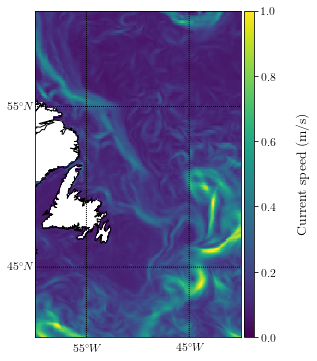

In [15]:
x, y = map_(lons, lats)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

map_.pcolor(x, y, data, vmin=0, vmax=1)

map_.drawcoastlines()

parallels = map_.drawparallels(np.arange(5, 85, 10), labels=[1, 0, 0, 0])
meridians = map_.drawmeridians(np.arange(5, 355, 10), labels=[0, 0, 0, 1])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('Current speed (m/s)', rotation=90)

fig.savefig('./plots/ecmwf_mean_april_current_2015.pdf', bbox_inches='tight')
plt.show()

# HYCOM Ocean Model

# ECMWF Atmosphere Model

Model information:

<table>
  <tr>
    <th>Product identifier</th>
    <th>WIND_GLO_WIND_L4_NRT_OBSERVATIONS_012_003</th> 
  </tr>
  <tr>
    <td>Spatial resolution</td>
    <td>1/4 deg; 1 vertical level (10 m)</td> 
  </tr>
  <tr>
    <td>Temporal resolution</td>
    <td>6-hourly mean</td> 
  </tr>
      <tr>
    <td>Grid</td>
    <td>Regular</td> 
  </tr>
  <tr>
    <td>Reanalysis</td>
    <td>No</td> 
  </tr>
</table>

Available to pull from IceDEF server:

<table>
  <tr>
    <td>Longitude Range</td>
    <td>40W - 60W</td>
  </tr>
  <tr>
    <td>Latitude Range</td>
    <td>40N - 60N</td>
  </tr>
</table> 

In [41]:
model_name = 'ECMWF'
atmosphere = metocean.Atmosphere(time_frame, model=model_name)

In [33]:
lats = atmosphere.data.latitude.values
lons = atmosphere.data.longitude.values
data = np.mean(atmosphere.wind.speeds.values, axis=0)

In [38]:
map_ = Basemap(projection='merc',
                  lon_0=-50,
                  lat_0=50,
                  lat_ts=50,
                  resolution='l',
                  llcrnrlon=min(lons),
                  llcrnrlat=min(lats),
                  urcrnrlon=max(lons),
                  urcrnrlat=max(lats),)

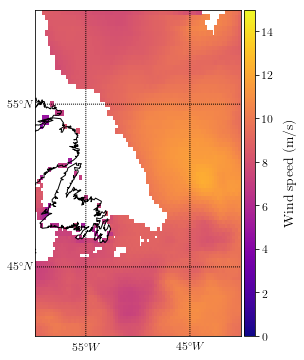

In [40]:
x, y = map_(lons, lats)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

map_.pcolor(x, y, data, vmin=0, vmax=15, cmap='plasma')

map_.drawcoastlines()

parallels = map_.drawparallels(np.arange(5, 85, 10), labels=[1, 0, 0, 0])
meridians = map_.drawmeridians(np.arange(5, 355, 10), labels=[0, 0, 0, 1])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Wind speed (m/s)', rotation=90)

fig.savefig('./plots/ecmwf_mean_april_wind_2015.pdf', bbox_inches='tight')
plt.show()

# NARR

Model information:

<table>
  <tr>
    <th>Product identifier</th>
    <th>North American Regional Reanalysis</th> 
  </tr>
  <tr>
    <td>Spatial resolution</td>
    <td>~0.3 deg (32 km); 1 vertical level (10 m)</td> 
  </tr>
  <tr>
    <td>Temporal resolution</td>
    <td>3-hourly mean</td> 
  </tr>
      <tr>
    <td>Grid</td>
    <td>Regular</td> 
  </tr>
  <tr>
    <td>Reanalysis</td>
    <td>Yes</td> 
  </tr>
</table>

Available to pull from IceDEF server:

<table>
  <tr>
    <td>Longitude Range</td>
    <td>40W - 60W</td>
  </tr>
  <tr>
    <td>Latitude Range</td>
    <td>40N - 60N</td>
  </tr>
</table> 

In [42]:
model_name = 'NARR'
atmosphere = metocean.Atmosphere(time_frame, model=model_name)

In [43]:
lats = atmosphere.data.latitude.values
lons = atmosphere.data.longitude.values
data = np.mean(atmosphere.wind.speeds.values, axis=0)

In [48]:
map_ = Basemap(projection='merc',
                  lon_0=-50,
                  lat_0=50,
                  lat_ts=50,
                  resolution='l',
                  llcrnrlon=min(lons[:-1]),
                  llcrnrlat=min(lats),
                  urcrnrlon=max(lons[:-1]),
                  urcrnrlat=max(lats),)

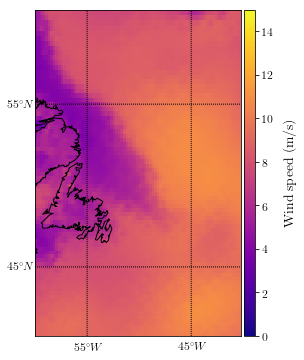

In [49]:
x, y = map_(lons[:-1], lats)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

map_.pcolor(x, y, data[:, :-1], vmin=0, vmax=15, cmap='plasma')

map_.drawcoastlines()

parallels = map_.drawparallels(np.arange(5, 85, 10), labels=[1, 0, 0, 0])
meridians = map_.drawmeridians(np.arange(5, 355, 10), labels=[0, 0, 0, 1])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Wind speed (m/s)', rotation=90)

fig.savefig('./plots/narr_mean_april_wind_2015.pdf', bbox_inches='tight')
plt.show()